In [1]:
print("om namo narayana")

om namo narayana


In [38]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [3]:
df = pd.read_csv(r'D:\spider\machine_learning\testset.csv')

In [4]:
df.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


In [5]:
from sklearn.datasets import load_digits

In [6]:
digits = load_digits()

In [7]:
print(digits.data.shape)
print(digits.target.shape)

(1797, 64)
(1797,)


In [8]:
print(df.head())
num_columns = []
data = df
data = data.fillna(data[:500].mean(axis = 0, skipna = True))
for i in range(len(data.columns)):
    print(i ,":", data.columns[i])

     datetime_utc  _conds   _dewptm   _fog   _hail   _heatindexm   _hum  \
0  19961101-11:00   Smoke       9.0      0       0           NaN   27.0   
1  19961101-12:00   Smoke      10.0      0       0           NaN   32.0   
2  19961101-13:00   Smoke      11.0      0       0           NaN   44.0   
3  19961101-14:00   Smoke      10.0      0       0           NaN   41.0   
4  19961101-16:00   Smoke      11.0      0       0           NaN   47.0   

    _precipm   _pressurem   _rain   _snow   _tempm   _thunder   _tornado  \
0        NaN       1010.0       0       0     30.0          0          0   
1        NaN      -9999.0       0       0     28.0          0          0   
2        NaN      -9999.0       0       0     24.0          0          0   
3        NaN       1010.0       0       0     24.0          0          0   
4        NaN       1011.0       0       0     23.0          0          0   

    _vism   _wdird  _wdire   _wgustm   _windchillm   _wspdm  
0     5.0    280.0    West    

In [245]:
#SELECT THE INPUT ACCORDING TO YOUR REQUIREMENT

#input_data = zip(data[data.columns[2]].tolist(), data[data.columns[5]].tolist(), data[data.columns[6]].tolist(), data[data.columns[8]].tolist(), data[data.columns[11]].tolist())
#input_data = zip(data[data.columns[2]].tolist(), data[data.columns[6]].tolist(), data[data.columns[11]].tolist())
#input_data = zip(data[data.columns[6]].tolist(), data[data.columns[11]].tolist())
input_data = np.array([data[' _tempm'].tolist()]).T
#input_data = list(input_data)
output_data = np.array(data[' _rain'].tolist())
print(output_data.shape)
#input_data = np.array(list(map(list, input_data)))
#output_data = np.array(list(map(list, input_data)))

(100990,)


In [246]:
x_train, x_test, y_train, y_test = train_test_split(input_data, output_data, test_size = 1 / 10, random_state = None)
#print(len(x_train), len(x_train[0]), x_train.shape)

In [247]:
logic = LogisticRegression()
logic.fit(x_train, y_train)

c:\users\arvin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [248]:
score = logic.score(x_test, y_test)

In [249]:
predictions = logic.predict(x_test)

In [250]:
cmatrix = metrics.confusion_matrix(predictions, y_test)
print(cmatrix)

[[9837  262]
 [   0    0]]


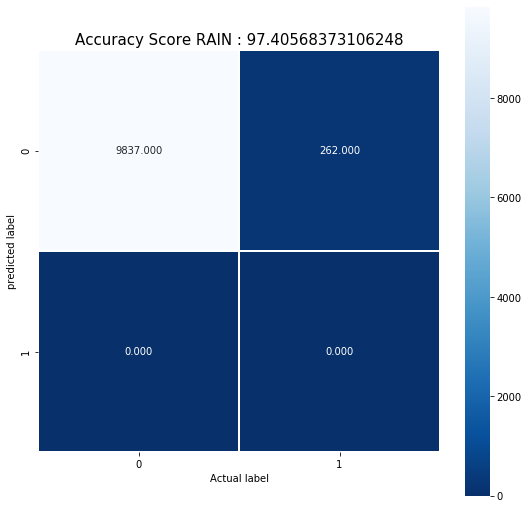

In [251]:
plt.figure(figsize = (9,9))
sns.heatmap(cmatrix, annot = True, fmt = '.3f', linewidths = 1, square = True, cmap = 'Blues_r');
plt.ylabel('predicted label');
plt.xlabel('Actual label');
all_sample_title = 'Accuracy Score RAIN : {0}'.format(score*100)
plt.title(all_sample_title, size = 15);

In [252]:
logic.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'warn',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'warn',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [253]:
print(logic.coef_)
print(logic.intercept_)
weights = []
bias = []
scores = []
weights.append(logic.coef_.tolist())
bias.append(logic.intercept_.tolist())
scores.append(score)
while(len(scores) > 1):
    bias.append(len(scores) - 1)
while(len(weights) > 1):
    weights.pop(len(weights) - 1)
while(len(bias) > 1):
    bias.append(len(bias) - 1)


[[-0.00634555]]
[-3.45032996]


c:\users\arvin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


1.0


Text(0.5, 1, 'accuracy SNOW100.0')

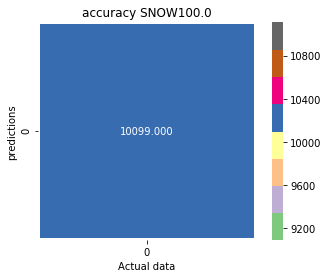

In [254]:
output_data = np.array(data[' _snow'].tolist())
x_train, x_test, y_train, y_test = train_test_split(input_data, output_data, test_size = 1/10.0, random_state = 0)
logic.fit(x_train, y_train)
predictions = logic.predict(x_test)
score = logic.score(x_test, y_test)
print(score)

cmatrix = metrics.confusion_matrix(predictions, y_test)

plt.figure()
sns.heatmap(cmatrix, annot = True, fmt = '.3f', linewidths = 2, square = True, cmap = 'Accent');
plt.ylabel('predictions')
plt.xlabel('Actual data')
plt.title("accuracy SNOW{}".format(score*100))



In [255]:
weights.append(logic.coef_.tolist())
bias.append(logic.intercept_.tolist())
scores.append(scores)
while(len(scores) > 2):
    bias.append(len(score) - 1)
while(len(weights) > 2):
    weights.pop(len(weights) - 1)
while(len(bias) > 2):
    bias.append(len(bias) - 1)

c:\users\arvin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Text(0.5, 1, 'accuracy FOG: 93.87068026537281')

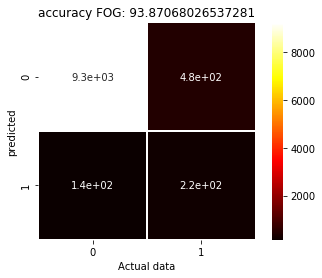

In [256]:
output_data = np.array(data[' _fog'])
x_train, x_test, y_train,  y_test = train_test_split(input_data, output_data, test_size = 1/10.0, random_state = None)

logic.fit(x_train, y_train)
score = logic.score(x_test, y_test)
predictions = logic.predict(x_test)

cmatrix = metrics.confusion_matrix(predictions, y_test)

plt.figure()
sns.heatmap(cmatrix, annot = True, cmap = 'hot', linewidths = 1, square = True)
plt.ylabel('predicted')
plt.xlabel('Actual data')
plt.title('accuracy FOG: {}'.format(score*100))

In [257]:
weights.append(logic.coef_.tolist())
bias.append(logic.intercept_.tolist())
scores.append(score)
while(len(scores) > 3):
    bias.append(len(scores) - 1)

In [258]:
print(len(weights), len(bias))
while(len(weights) > 3):
    weights.pop(len(weights) -1)
while(len(bias) > 3):
    bias.pop(len(bias) -1)

3 3


c:\users\arvin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Text(0.5, 1, 'accuracy HAIL = 99.98019605901575')

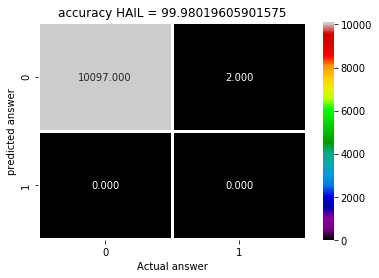

In [259]:
output_data = np.array(data[' _hail'])
x_train, x_test, y_train, y_test = train_test_split(input_data, output_data, test_size = 1/10.0)

logic.fit(x_train, y_train)

score = logic.score(x_test, y_test)
predictions = logic.predict(x_test)

cmatrix = metrics.confusion_matrix(predictions, y_test)

plt.figure()
sns.heatmap(cmatrix, square = False, linewidths = 2, cmap = 'nipy_spectral', annot = True, fmt = '.3f')
plt.xlabel('Actual answer')
plt.ylabel('predicted answer')
plt.title('accuracy HAIL = {}'.format(score*100))

In [260]:
weights.append(logic.coef_.tolist())
bias.append(logic.intercept_.tolist())
scores.append(score)
while(len(scores) > 4):
    bias.append(len(scores) - 1)
while(len(weights) > 4):
    weights.pop(len(weights) - 1)
while(len(bias) > 4):
    bias.pop(len(bias) - 1)

c:\users\arvin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Text(0.5, 1, 'accuracy THUNDER= 98.9701950688187')

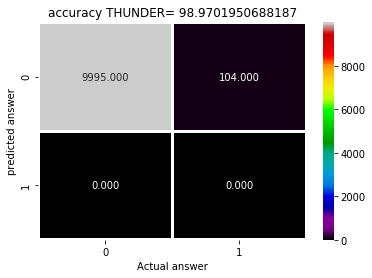

In [261]:
output_data = np.array(data[' _thunder'])
x_train, x_test, y_train, y_test = train_test_split(input_data, output_data, test_size = 1/10.0)

logic.fit(x_train, y_train)

score = logic.score(x_test, y_test)
predictions = logic.predict(x_test)

cmatrix = metrics.confusion_matrix(predictions, y_test)

plt.figure()
sns.heatmap(cmatrix, square = False, linewidths = 2, cmap = 'nipy_spectral', annot = True, fmt = '.3f')
plt.xlabel('Actual answer')
plt.ylabel('predicted answer')
plt.title('accuracy THUNDER= {}'.format(score*100))

In [262]:
weights.append(logic.coef_.tolist())
bias.append(logic.intercept_.tolist())
scores.append(score)
while(len(scores) > 5):
    bias.append(len(scores) - 1)
while(len(weights) > 5):
    weights.pop(len(weights) - 1)
while(len(bias) > 5):
    bias.pop(len(bias) - 1)

In [263]:
print(weights)

[[[-0.006345545339051696]], [[-0.6011366362961678]], [[-0.3378294578589713]], [[-0.13989263087242257]], [[-0.0019416654646894004]]]


In [264]:
#with_temp_hum = {'rain_accuracy':97.61, 'rain_weights':(weights[0], bias[0]), 'snow_accuracy':100, 'snow_weights':(weights[1], bias[1]), 'fog_accuracy':95.28, 'fog_weights':(weights[2], bias[2]), 'hail_accuracy':100, 'hail_weights':(weights[3], bias[3]), 'thunder_accuracy':98.9999, 'thunder_weights':(weights[4], bias[4])} 

In [265]:
#with_temp_hum_dew = {'rain_accuracy':97.4, 'rain_weights':(weights[0], bias[0]), 'snow_accuracy':100, 'snow_weights':(weights[1], bias[1]), 'fog_accuracy':95.35, 'fog_weights':(weights[2], bias[2]), 'hail_accuracy':99.97, 'hail_weights':(weights[3], bias[3]), 'thunder_accuracy':99.108, 'thunder_weights':(weights[4], bias[4])} 

In [266]:
#with_temperature = {'rain_accuracy':scores[0], 'rain_weights':(weights[0], bias[0]), 'snow_accuracy':scores[1], 'snow_weights':(weights[1], bias[1]), 'fog_accuracy':scores[2], 'fog_weights':(weights[2], bias[2]), 'hail_accuracy':scores[3], 'hail_weights':(weights[3], bias[3]), 'thunder_accuracy':scores[4], 'thunder_weights':(weights[4], bias[4])}

In [ ]:
#THE PROGRAM HAS BEEN RUN AND THE VALUES ARE STORED IN THE RESPECTIVE DICTIONARY

In [267]:
with_temperature.get('rain_accuracy')#temperature is the key feature

0.9740568373106249